In [1]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from dataset.mnist import load_mnist
import matplotlib.pylab as plt

In [2]:
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten = True, normalize = False)

In [3]:
print(train_image_data.shape)
print(train_label_data.shape)
print(test_image_data.shape)
print(test_label_data.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
a = int(input('1부터 60000 사이의 숫자를 입력하세요 : ')) -1

1부터 60000 사이의 숫자를 입력하세요 : 1


In [5]:
image = train_image_data[a]
# image.shape

In [6]:
image_reshaped = image.reshape(28,28)
# image_reshaped.shape

<function matplotlib.pyplot.show(*args, **kw)>

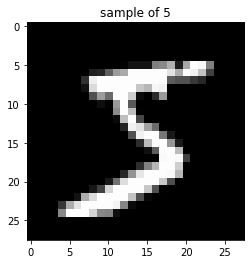

In [7]:
label = train_label_data[a]
plt.figure(figsize=(4,4))
plt.title("sample of "+str(label))
plt.imshow(image_reshaped, cmap ="gray")
plt.show

In [8]:
def get_data():
    (image_train, label_train), (image_test, label_test) = load_mnist(flatten = True, normalize = False)
    return image_test, label_test

In [9]:
def softmax(matrix):
    exponential_matrix = np.exp(matrix)
    sum_of_exponential_matrix = np.sum(exponential_matrix)
    y = exponential_matrix / sum_of_exponential_matrix
    return y

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [11]:
def predict(network,x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3)+b3
    y = softmax(a3)
    
    return y

In [12]:
images, labels = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(images)):
    y = predict(network, images[i])
    p = np.argmax(y)
    if p == labels[i]:
        accuracy_cnt += 1
print("Accuracy: " + str(float(accuracy_cnt) / len(images)))
#시간대비 accuracy가 높아지면, hidden layer 수를 늘림

Accuracy: 0.9207


In [13]:
images, labels = get_data()
network = init_network()

In [14]:
print("shape of images =", images.shape)
print("shape of weight1 =", network["W1"].shape)
print("shape of weight2 =", network["W2"].shape)
print("shape of weight3 =", network["W3"].shape)


shape of images = (10000, 784)
shape of weight1 = (784, 50)
shape of weight2 = (50, 100)
shape of weight3 = (100, 10)


In [15]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(images), batch_size):
    x_batch = images[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==labels[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(images)))

Accuracy: 0.9207


## 데이터 학습
이미 학습된 데이터를 가져와 매개변수 값으로 적용시켜보는 활동, 60000 중 10000개는 테스터, 가중치 매개변수
- 사람이 학습시킬떄 : 
- 기계가 학습시킬때 : 머신러닝의 방법론, 
- 신경망을 이용할떄 : 

훈련 데이터 7: 테스트 데이터 3

학습 데이터가 많을수록, 결과가 최적화됨
일반화시키기 위해서 훈련과 테스트로 나눔
오버피팅 : 하나 하나의 데이터셋에 치중된 상태

## loss function
- 실제 데이터와 예측한 데이터와 얼마나 다른지 수치화

In [16]:
import numpy as np

In [17]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
#9개의 데이터에서 숫자 2일 확률이 0.6이다
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#실제로 숫자 2가 맞다.

In [18]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
#평균 제곱 오차(신경망-정답레이블)합의 제곱

In [19]:
mean_squared_error(np.array(y), np.array(true))
#오차값이 작으므로 정답에 가까움

0.09750000000000003

In [20]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(true))
#오차값이 꽤 큼

0.5975

In [21]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [22]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true =[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [23]:
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [24]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))
#오차값 너무큼

2.302584092994546

In [25]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True)
print(x_train.shape)
print(t_train.shape)


(60000, 784)
(60000,)


In [26]:
train_size = x_train.shape[0]
batch_size = 100 #랜덤 숫자 넣을칸
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [27]:
ran=[]
ran = np.random.choice(60000, 100)

In [28]:
ran

array([50518,  9606, 59834, 58376, 21440, 15411, 52722, 23647, 44144,
        1167, 26555, 38602, 52097, 38685, 44088,  6314, 16697, 32769,
       41648, 47716, 14513,  1396, 59184,   339, 18681,  8952, 51964,
       42282, 44643, 26025, 59313,  7695, 42543,  5083, 45101, 15843,
       40247, 37137, 41306, 12095, 32931, 24308, 20911, 39933, 57791,
       45149, 49469, 40025, 32788, 16075, 18636, 10668, 37439, 47054,
       18727, 46027,  8990, 53888, 32713, 15484, 52953,  2670, 10765,
       39424,   242, 10539,  7518, 18305, 26518, 27093, 33466, 24934,
       20001, 42618, 19973, 27929, 29796, 21532, 10182, 55629, 11413,
       32787, 28420, 57268, 48977, 32987, 29379, 59993, 53942, 58271,
       47340, 44536, 23612, 55728, 50483,  5349, 19069, 13866, 46097,
        8257])

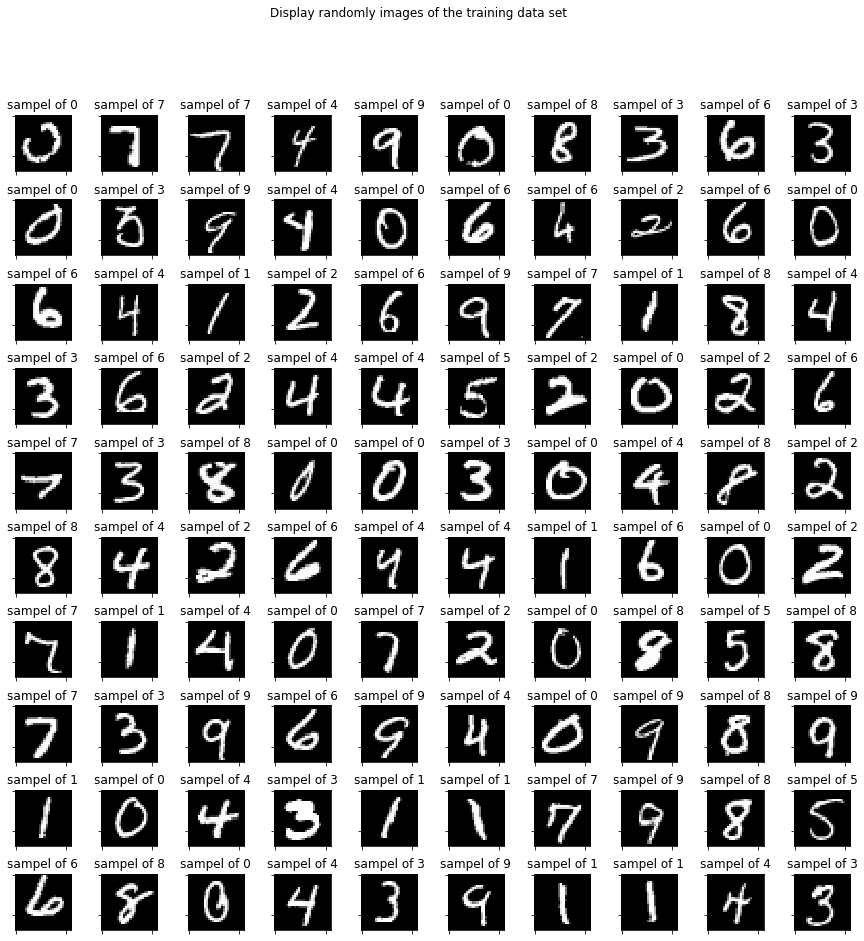

In [29]:
# for rn in range(0,99):
#     image = train_image_data[rn]
#     # image.shape
#     image_reshaped = image.reshape(28,28)
#     # image_reshaped.shape
#     label = train_label_data[rn]
#     plt.figure(figsize=(1, 1))
#     plt.title("sample of "+ str(label))
#     plt.imshow(image_reshaped, cmap ="gray")
#     plt.show

def displayData(X, X_label):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("sampel of " + str(X_label[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(train_image_data, train_label_data) 

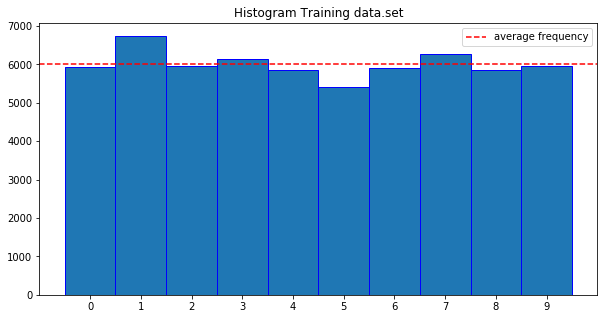

In [30]:
x = train_image_data
y = train_label_data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
ax.hist(y, bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar", align='left')
ax.set_title("Histogram Training data.set")
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.axhline(y=(y.size/10), label="average frequency", linestyle="dashed", color='r')
ax.legend()

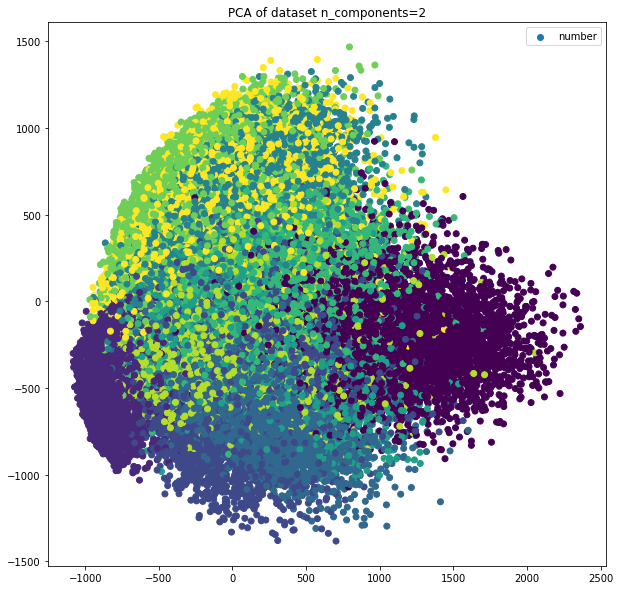

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.set_title('PCA of dataset n_components=2')
ax.scatter(proj[:,0],proj[:,1],c=y, label='number')
ax.legend()

In [32]:
def cross_entropy_error_one_hot(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y))/ bactch_size

In [33]:
def cross_entropy_error_label(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### Gradient
- 미분, 편미분

In [34]:
# def numerical_differencial(f, x):
#     h=10e-50
#     return (f(x+h)-f(x)) / h

In [35]:
def numerical_differencial(f, x):
    h=1e-4#정밀도를 조정할 수 있음
    return (f(x+h)-f(x-h)) / (2*h)

In [36]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

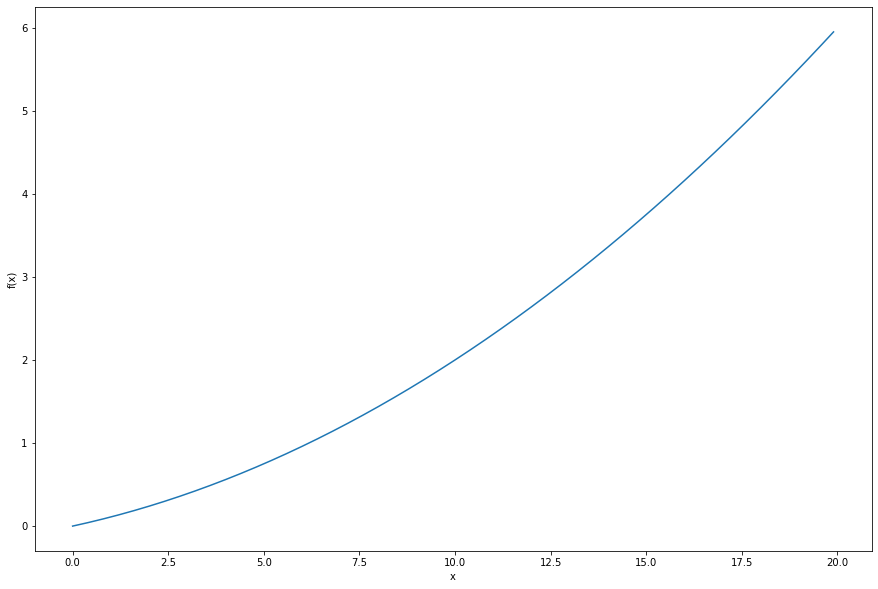

In [37]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.figure(figsize = (15,10))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [38]:
numerical_differencial(function_1, 5)

0.1999999999990898

In [39]:
numerical_differencial(function_1, 10)

0.2999999999986347

In [40]:
def function_2(x):
    return x[0]**2 + x[1]**x

In [41]:
def function_tmp1(x0):
    return x0*x0 +4.0**2.0

In [42]:
numerical_differencial(function_tmp1, 3.0)

6.00000000000378

In [43]:
def function_tmp2(x1):
    return 3.0**2.0 +x1*x1

In [44]:
numerical_differencial(function_tmp2, 4.0)

7.999999999999119

#### 기울기

In [45]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h
        fxh1 = f(x)
        
        x[index] = tmp_val + h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp_val
        
    return grad
        